In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

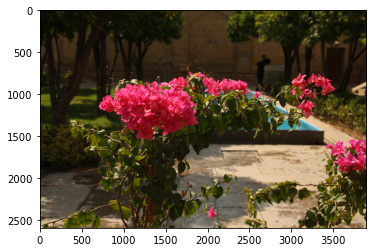

In [46]:
im_path = "../../Examples/set1/IMG_0720.jpg"
im = cv2.cvtColor(plt.imread(im_path), cv2.COLOR_BGR2GRAY)
im = plt.imread(im_path)

plt.imshow(im)


### Apply apply GaussianBlur on your images with kernel size 33 and 55

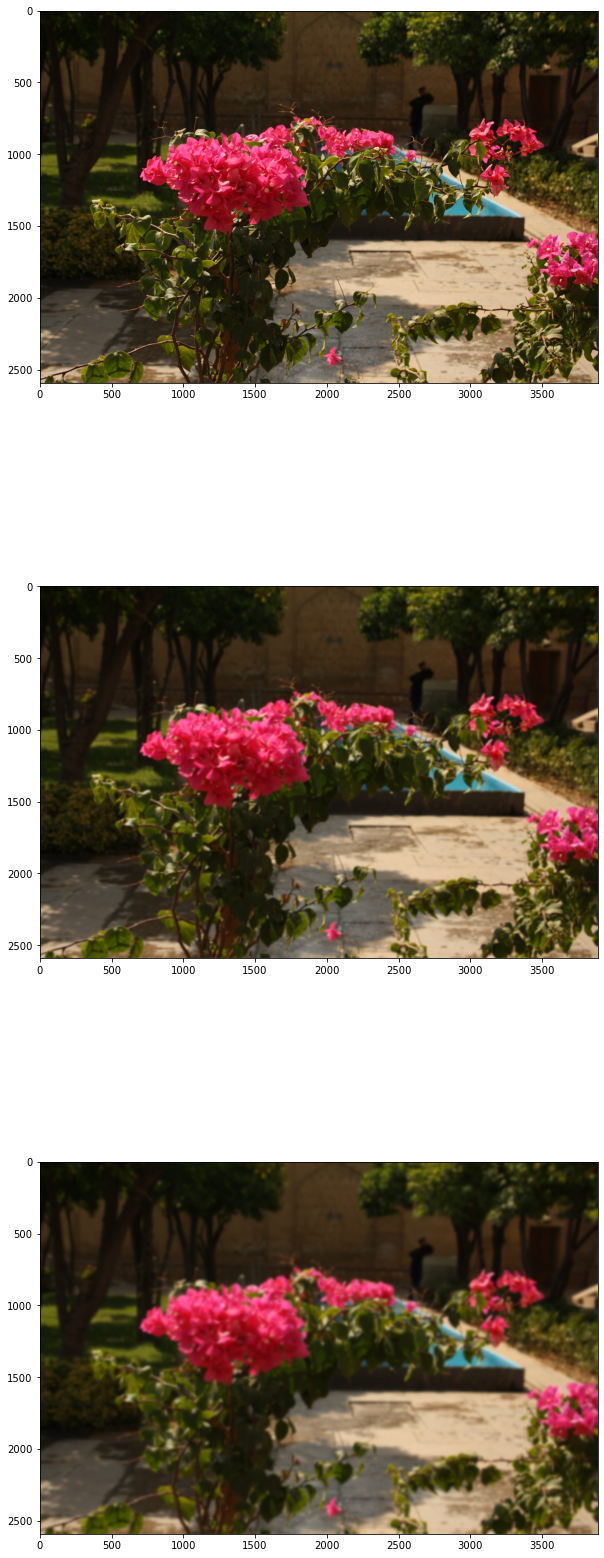

In [52]:
image1 = cv2.GaussianBlur(im,(33, 33), 0)
image2 = cv2.GaussianBlur(im,(55, 55), 0)

fig,ax = plt.subplots(3,1, figsize=(10,30))
ax[0].imshow(im)
ax[1].imshow(image1)
ax[2].imshow(image2)


### Use the functions in the utils.ipynb to calcuate the entropy, am_power, and energy, of the original images and the filtered images

In [19]:
def am_entropy(nimg , N=256):
    M = nimg.shape
    ssz = M[0] * M[1]
    hist,bins = np.histogram(nimg.flatten(),N,[0,N])
    hist = hist / ssz
    ent = -np.sum( hist * np.log2(hist+0.0001))
    return ent

def am_power(a):
    pa = 0.0 
    dim1 = a.shape
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
        for i in range(dim1[0]):
            for j in range(dim1[1]):
                pa += a[i,j]**2
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]
        for i in range(dim1[0]):
            for j in range(dim1[1]):
                for k in range(dim1[2]):
                    pa += a[i,j,k]**2
    pa = pa / sz
    return pa

def am_energy(a):
    pa = 0.0 
    dim1 = a.shape
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
        for i in range(dim1[0]):
            for j in range(dim1[1]):
                pa += a[i,j]**2
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]
        for i in range(dim1[0]):
            for j in range(dim1[1]):
                for k in range(dim1[2]):
                    pa += a[i,j,k]**2
    return pa

In [20]:
am_entropy(im), am_power(im), am_energy(im)

(16.995239788606373, 7078.554015951, 214006546477.0)

In [51]:
am_entropy(image1), am_power(image1), am_energy(image1)

(17.002702017548245, 6805.698778073877, 205757290059.0)

In [50]:
am_entropy(image2), am_power(image2), am_energy(image2)

(16.977017223839574, 6674.301022740383, 201784730159.0)

### Can you find a way to calcuate the energy and power faster

In [54]:
print('image power=', (im.astype(np.float32)**2).sum())
print('image energy=', (im.astype(np.float32)**2).mean())


image power= 214006840000.0
image energy= 7078.564


### Apply this kernel1 on your image.